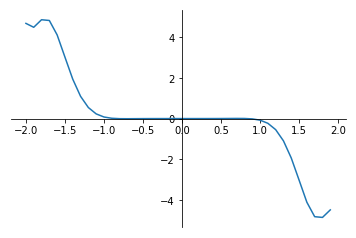

Iteration	 	 a		 	 b		 	 c
0		 -2.00000000	 1.00000000	 -0.50000000
1		 -2.00000000	 -0.50000000	 -1.25000000
2		 -1.25000000	 -0.50000000	 -0.87500000
3		 -0.87500000	 -0.50000000	 -0.68750000
4		 -0.87500000	 -0.68750000	 -0.78125000
5		 -0.87500000	 -0.78125000	 -0.82812500
6		 -0.87500000	 -0.82812500	 -0.85156250
7		 -0.85156250	 -0.82812500	 -0.83984375
8		 -0.83984375	 -0.82812500	 -0.83398438
9		 -0.83984375	 -0.83398438	 -0.83691406
10		 -0.83984375	 -0.83691406	 -0.83837891
11		 -0.83984375	 -0.83837891	 -0.83911133
12		 -0.83984375	 -0.83911133	 -0.83947754
13		 -0.83984375	 -0.83947754	 -0.83966064
14		 -0.83966064	 -0.83947754	 -0.83956909
15		 -0.83966064	 -0.83956909	 -0.83961487
16		 -0.83966064	 -0.83961487	 -0.83963776
17		 -0.83966064	 -0.83963776	 -0.83964920
18		 -0.83964920	 -0.83963776	 -0.83964348
The root after 19th iteration is: -0.83964348 


In [19]:
# 1.1 Bisection Method
import matplotlib.pyplot as plt
import numpy as np
import math

def func(x):
    #return np.exp(x-2) +x**3-x
    return (2*x*np.cos(x)-2*x) + np.sin(x**3)
    #return (1)/(x)
def bisection(a,b,tolerance):
    if (func(a) * func(b) >= 0):
        print("You have not assumed right a and b\n")
        return
    
    count = 0
    print ("Iteration\t \t a\t\t \t b\t\t \t c")
    while ((b-a) > tolerance):
    #for i in range(15):
        
        # Find middle point
        c = (a+b)/2
        print ("%d\t\t %.8f\t %.8f\t %.8f" %(count, a ,b ,c))
        # Check if middle point is root
        if (func(c) == 0):
            break

        # Decide the side to repeat the steps
        if (func(c)*func(a) < 0):
            b = c
        else:
            a = c
        count += 1
    print("The root after %dth iteration is: %.8f " %(count, c))

x = np.arange(-2,2,0.1)
y = func(x)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y)
plt.show()

a = -2
b = 1
tolerance = 0.00001
bisection(a, b, tolerance)

In [20]:
# 1.2 Fixed Point Iteration

def func2(x):
    # Question 1
    #return (2*x+2)**(1/3)
    #return np.log(7-x)
    #return np.log(4-np.sin(x))
    
    # Question 3
    #return 3**(1/2)
    #return 5**(1/2)
    
    #Question 5
    #return np.cos(x)**2
    # derivative of cos^2x is -2cos(x)sin(x)
    #return -2*np.cos(x)*np.sin(x) gives us a local convergence where S |g'(r)| < 1
    
    #Question 7
    return 1-5*x+(15)/(2)*x**2-(5)/(2)*x**3

def fpi(x,iteration):
    print("\n i \t \t \t Xi \t \t \t g(Xi)")
    for i in range(iteration):
        print (i, "\t \t %.6f \t" %x, end= " ")
        x = func2(x)
        print("%.6f \t \t " %x)
    root = x
    print("The root after %dth iteration is: " "%.6f" %(i,root))

x = 0.5
iteration = 10

fpi(x, iteration)


 i 	 	 	 Xi 	 	 	 g(Xi)
0 	 	 0.500000 	 0.062500 	 	 
1 	 	 0.062500 	 0.716187 	 	 
2 	 	 0.716187 	 0.347619 	 	 
3 	 	 0.347619 	 0.063182 	 	 
4 	 	 0.063182 	 0.713398 	 	 
5 	 	 0.713398 	 0.342350 	 	 
6 	 	 0.342350 	 0.066965 	 	 
7 	 	 0.066965 	 0.698056 	 	 
8 	 	 0.698056 	 0.313960 	 	 
9 	 	 0.313960 	 0.092113 	 	 
The root after 9th iteration is: 0.092113


In [21]:
from sympy import *

#1.3 Limits of Accuracy

'''Question 1: Let f(x) = sinx -x (a) find the multiplicity of the root r = 0. (b) Using fsolve (python equivalent to fzero in matlb) with initial guess x = 0.1 to locate a root.
   What are the forward and backward errors of fsolve response?'''

equation = "sin(x)-x"
equation2 = "2x*cos(x) -2x + sinx^3"

def func3(x):
    return sin(x) - x

def func4(x):
    return 2*x*cos(x)-2*x + sin(x**3)
    
def calculate_derivative(derivative_times):
    x = symbols('x')
    multiplicity = 1
    for i in range (derivative_times):
        deriv_equation = diff(func3(x), x,i+1)     #diff is a function from sympy library that calculate the derivative of an equation
        print((i+1),"Derivative is: " , deriv_equation, "\t", end = " ")
        x_sub = 0
        result = deriv_equation.subs({x:x_sub})
        if(result == 0):
            multiplicity += 1
        print("Result when root x = %d is: "%x_sub, result)
    print("Multiplicity is: ", multiplicity)
        
calculate_derivative(3)

'''Question 3: Use fzero to find the root of f(x) = 2xcosx-2x+sinx^3 on [-0.1,0.2]. Report the forward and backward errors. (b) Run the bisection Method 
    with initial interval [-0.1, 0.2] to find as many correct digits as possible, and report your conclusion'''

def forward_error(root, approx_root):
    forward_error = abs(root - approx_root)
    print("%s forward error is: " %(equation), forward_error)
    
forward_error(0,-0.000000020735)

def backward_error(approx_root):
    backward_error = abs(func3(approx_root))
    print("%s backward error is: " %(equation), backward_error)

backward_error(-0.000000020735)

back_error = abs(func4(0.000169))
print("%.6f" %back_error)

'''Question 5: Use (1.21) to approximate the root of f(x) = (x-1)(x-2)(x-3)(x-4)-10^-6x^6 near r = 4. Find error magnification factor. 
    Use fzero to check your approximation'''
def g_function(x):
    return x**6

def sensitivity_formula(epsilon,root):
    delta_r = -((epsilon*g_function(root))/(math.factorial(root-1)))
    print("delta_r is: " "%.7f" %delta_r)
    predicted_root = root + delta_r
    print("Predicted root is: " "%.7f" %predicted_root)

sensitivity_formula(-0.000001,4)

def error_mag_factor(root):
    error_magnification_factor = abs(g_function(root))/(abs(root*math.factorial(root-1)))
    print("Error magnification factor is: " "%.7f" %error_magnification_factor)

error_mag_factor(4)

1 Derivative is:  cos(x) - 1 	 Result when root x = 0 is:  0
2 Derivative is:  -sin(x) 	 Result when root x = 0 is:  0
3 Derivative is:  -cos(x) 	 Result when root x = 0 is:  -1
Multiplicity is:  3
sin(x)-x forward error is:  2.0735e-08
sin(x)-x backward error is:  0
0.000000
delta_r is: 0.0006827
Predicted root is: 4.0006827
Error magnification factor is: 170.6666667


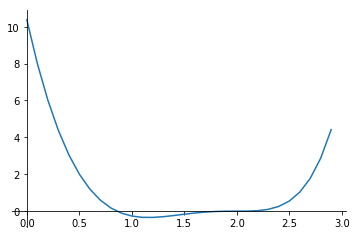

1 Derivative is:  -21*x**2 + 14*x*exp(x - 2) + 40*x + 2*exp(x - 2) - 26 	 Result when root x = 0 is:  -4.23119003924763
2 Derivative is:  2*(7*x*exp(x - 2) - 21*x + 8*exp(x - 2) + 20) 	 Result when root x = 0 is:  16.0923771167950
3 Derivative is:  2*(7*x*exp(x - 2) + 15*exp(x - 2) - 21) 	 Result when root x = 0 is:  -30.3965557271623
Multiplicity m is:  1

Iteration 	 	 xi 	 	 	 	 ei
1 	 	 0.77157738 	 	 0.77157738
2 	 	 0.84341357 	 	 0.07183619
3 	 	 0.85670789 	 	 0.01329432
4 	 	 0.85714240 	 	 0.00043451
5 	 	 0.85714286 	 	 0.00000046

 	 	 ei/ei-1
1691944.4249893175
0.09310303771672594
0.18506433415051363
0.0326841010804807
0.0010495201501070314
The value of the root is: 0.85714286

 	 Modified newton method results
Iteration 	 	 xi
1 	 	 0.77157738
2 	 	 0.84341357
3 	 	 0.85670789
4 	 	 0.85714240
5 	 	 0.85714286
The value of the root is: 0.85714286


In [22]:
#1.4 Newton's Method
import array 

def func5(x):
    '''Question 3: Apply Newton's Method to find the only root ot as much accuracy as possible, and find the root's multiplicity.
        Then use modified newton method to converge to the root quadratically.'''
    #return 27*x**3+54*x**2+36*x+8
    #return 36*x**4-12*x**3+37*x**2-12*x+1
    '''Question 5: A silo composed of a right circular cylinder of height 10 m surmounted by a hemispherical dome contains 400 m^3 of volume. Find the base
        radius of the silo to four correct decimal places.'''
    #return (2/3)*np.pi*x**3 + np.pi*10*x**2-400
    '''Question 7: Consider the function f(x) = e^sin^3x + x^6 -2x^4 -x^3 - 1 on the interval [-2,2]. Plot the function on the interval
        and find all three roots to six correct decimal places. Determine which roots converge quadratically, and find the multiplicity of the roots that converge linearly'''
    #return exp(sin(x)**3)+x**6-2*x**4-x**3-1
    '''Question 9: Apply Newton's Method to find both roots of the function f(x) = 14xe^x-2 -12e^x-2 - 7x^3 + 20x^2 -26x +12 on interval [0,3]
        For each root, print out the sequence of iterates, the errors ei, and the relevant error ratio ei+1/ei^2 that converges to a nonzero limit. '''
    return 14*x*exp(x-2) - 12*exp(x-2) - 7*x**3 + 20*x**2 - 26*x + 12
    '''Question 11: Use the ideal gas law to compute an initial guess, followed by Newton's Method applied to the van der Waals equation to find the volume
        of one mole of oxygen at 320 K and a pressure of 15 atm. For Oxygen a = 1.36 and b - 0.003183. State your initial guess and solution with three significant digits'''
    #return (15+(1.36/(x**2)))*(x-(0.003183))-0.0821*320
    
def derivFunc5(x):
    '''Derivatives of the functions for question 3'''
    #return 81*x**2+108*x+36
    #return 144*x**3-36*x**2+74*x-12
    '''Derivatives of the function for question 5'''
    #return 6.28318530717959*x**2 + 62.8318530717959*x
    "Derivative of the function for question 7"
    #return 6*x**5 - 8*x**3 - 3*x**2 + 3*exp(sin(x)**3)*sin(x)**2*cos(x)
    '''Derivative of the function for question 9'''
    return -21*x**2 + 14*x*exp(x - 2) + 40*x + 2*exp(x - 2) - 26
    #return (1)/(4*x**2*(1-(3)/(4*x))**(2/3))
    '''Derivative of the function in question 11'''
    #return 15 + 1.36/x**2 - 2.72*(x - 0.003183)/x**3

'''Graphing the function'''
x = np.arange(0,3,0.1)
y = 14*x*np.exp(x-2) - 12*np.exp(x-2) - 7*x**3 + 20*x**2 - 26*x + 12
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(x, y)
plt.show()

def derivative(derivative_times):
    x = symbols('x')
    multiplicity = 1
    for i in range (derivative_times):
        deriv_equation = diff(func5(x), x,i+1)     #diff is a function from sympy library that calculate the derivative of an equation
        print((i+1),"Derivative is: " , deriv_equation, "\t", end = " ")
        root = 0.75
        result = deriv_equation.subs({x:root})
        if(result == 0):
            multiplicity += 1
        print("Result when root x = %d is: "%root, result)
    print("Multiplicity m is: ", multiplicity)

derivative(3)

root = 0
def newton_method(x):
    iteration = 0
    global root
    arr = array.array('f', [])
    print("\nIteration \t \t xi \t \t \t \t ei")
    h = func5(x) / derivFunc5(x)
    while (abs(h) >= 0.0001):
        iteration += 1
        h = func5(x) / derivFunc5(x)
        x = x - h
        error = abs(x - root)
        arr.append(error)
        root = x
        print("%d \t \t %.8f \t \t %.8f" %(iteration,root,error))
    print('\n \t \t ei/ei-1')
    for i in range (0,len(arr)):
        error_bound = (arr[i])/(arr[i-1])
        print(error_bound)
    print("The value of the root is: " "%.8f" %root)
    
newton_method(0.6)


def modified_newton_method(x,multiplicity):
    iteration = 0
    print("\n \t Modified newton method results")
    print("Iteration \t \t xi")
    h = multiplicity*func5(x) / derivFunc5(x)
    while(abs(h) >= 0.0001):
        iteration += 1
        h = multiplicity*func5(x) / derivFunc5(x)
        x = x - h
        print("%d \t \t %.8f" %(iteration,x))
    print("The value of the root is: " "%.8f" %x)

modified_newton_method(0.6,1)

In [23]:
# 1.5 Secant Method

def f(x):
    '''Question 1: Apply Secant Method to the following equations with initial guesses x0 = 1 and x1 = 2'''
    # equation 1
    #return x**3-2*x-2
    # equation 2
    #return np.exp(x)+x-7
    # equation 3
    return np.exp(x)+np.sin(x)-4

def secant_method(x0, x1, iteration):
    print("Iterations \t xi")
    for i in range(iteration):
        if (f(x1) - f(x0) == 0):
            return x1
        x_temp = x1 - (f(x1)*(x1-x0))/(f(x1)-f(x0))
        x0 = x1
        x1 = x_temp
        print("%d \t \t %.8f" %(i+1,x1))
    print("The value of the root is: " "%.8f" %x1)

x0 = 1
x1 = 2
iteration = 6
secant_method(x0,x1,iteration)

Iterations 	 xi
1 	 	 1.09290658
2 	 	 1.11935669
3 	 	 1.13010245
4 	 	 1.12998010
5 	 	 1.12998050
6 	 	 1.12998050
The value of the root is: 1.12998050
